In [4]:
import networkx as nx
from icecream import ic
import numpy as np

## Functions

In [5]:
def find_difference(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    
    # Find the elements present in set1 but not in set2
    difference1 = set1 - set2
    
    # Find the elements present in set2 but not in set1
    difference2 = set2 - set1
    
    return difference1, difference2

In [6]:
# nx.get_node_attributes(G_st, "node_color")

In [7]:
def plot_graph(G):
    labels = {node: node for node in G.nodes}
    edge_styles = nx.get_edge_attributes(G, 'style')
    node_colors = nx.get_node_attributes(G, "node_color")
    ic(node_colors, G.nodes)


    pos = nx.planar_layout(G, )
    # pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)

    if node_colors:
        for node in node_colors.keys():
            nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=node_colors[node])

    for edge in G.edges():
        nx.draw_networkx_edges(G, pos, edgelist=[edge], style=edge_styles[edge])
    nx.draw_networkx_labels(G, pos, labels=labels);

## Begin

In [8]:
G = nx.Graph()
edges = [(1,2), (1,3), (1,4), 
        (2,3), (2,4),
        (3,4), (3,5),
        (5,6),
        (6,7), (6,8),
        (7,8)]
for edge in edges:
    G.add_edge(*edge, **{"style":"solid"} )

ic| node_colors: {}, G.nodes: NodeView((1, 2, 3, 4, 5, 6, 7, 8))


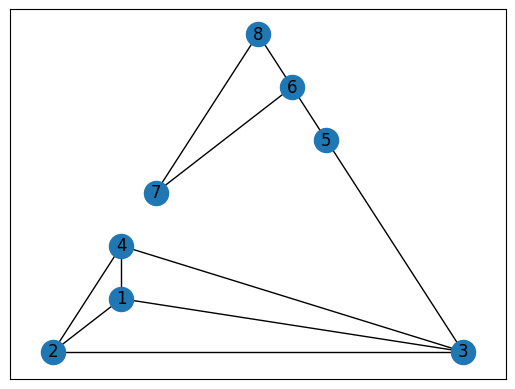

In [9]:
plot_graph(G)

In [62]:
bicon_prop = {"style": "dashed"}
bicon_edges = [(1,5, bicon_prop),
               (3,7, bicon_prop),
               (5,8, bicon_prop),]
G.add_edges_from(bicon_edges)

ic

| node_colors: {}, G.nodes: NodeView((1, 2, 3, 4, 5, 6, 7, 8))


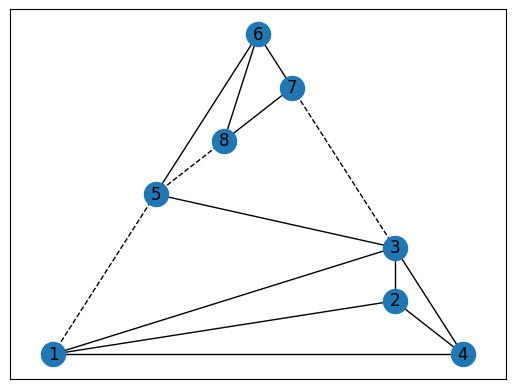

In [63]:
plot_graph(G)

## Triangulation

In [64]:
nx.is_chordal(G)

False

In [65]:
G_tri, alpha = nx.complete_to_chordal_graph(G.copy())

In [66]:
find_difference(G_tri.edges, G.edges)

({(5, 7)}, set())

In [67]:
G_tri[5][7]["style"] = ":"

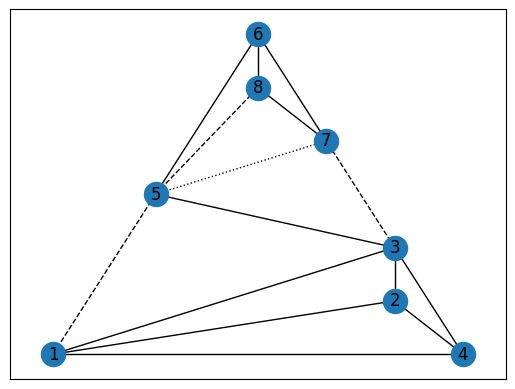

In [ ]:
plot_graph(G_tri)

### Seperating triangles

In [68]:
l3_cycles = sorted(nx.simple_cycles(G_tri, 3))
m = len(list(G_tri.edges))
n = len(list(G_tri.nodes))
ic(len(l3_cycles), m, n, m-n+1);
# #3 cycles ==? edges - # vertices + 1

ic| len(l3_cycles): 10, m: 15, n: 8, m-n+1: 8


In [85]:
G_tri2 = G.copy()
G_tri2.add_edge(3,6, **{"style":":"} )

l3_cycles = sorted(nx.simple_cycles(G_tri2, 3))
m = len(list(G_tri2.edges))
n = len(list(G_tri2.nodes))
ic(len(l3_cycles), m, n, m-n+1);
# #3 cycles ==? edges - # vertices + 1

ic| len(l3_cycles): 9, m: 15, n: 8, m-n+1: 8


In [86]:
G_st = G_tri2.copy()
# delete edge between 2,3. Create node 9. Add edges (2,9 / 9,3/ 4,9)


# new_node_color = "#fcba03"
G_st.remove_edge(2,3)

new_node = max(G_tri.nodes()) + 1 
G_st.add_node(new_node, **{"node_color":"#fcba03" })
G_st.nodes


NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9))

In [87]:
st_edges = [(2,9), (9,3), (4,9)]

st_prop = {"style": "solid"}
st_edges = [(2,9, st_prop),
               (9,3, st_prop),
               (4,9, st_prop),]
G_st.add_edges_from(st_edges)


ic| node_colors: {9: '#fcba03'}
    G.nodes: NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9))


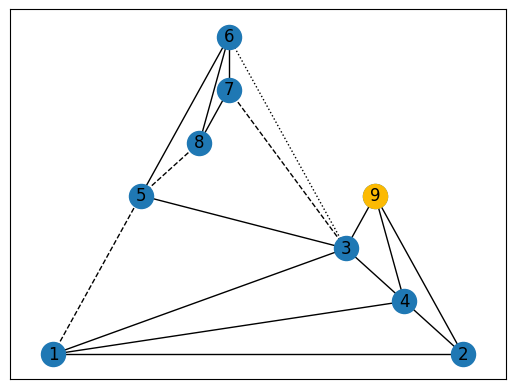

In [88]:
plot_graph(G_st)

In [84]:
l3_cycles = sorted(nx.simple_cycles(G_st, 3))
m = len(list(G_st.edges))
n = len(list(G_st.nodes))
ic(len(l3_cycles), m, n, m-n+1);

ic| len(l3_cycles): 9, m: 17, n: 9, m-n+1: 9


In [90]:
is_triangulated = all(len(list(nx.neighbors(G_st, node))) <= 3 for node in G_st.nodes)
print("Is the graph properly triangulated?", is_triangulated)

Is the graph properly triangulated? False
